MULTIVARIATE REGRESSION

In [1]:
import pandas as pd
import numpy as np

# Plotting
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
path = r'C:\Users\felipe.tufaile\Documents\GitHub\MultivariateRegression\ex1\{file}.txt'
file = 'ex1data1'
data = pd.read_csv(path.format(file=file), sep=",", header=None)
data = data.rename(columns={0:'pop_city_10k', 1:'profit_10k'})

In [ ]:
## WITH COMPETITORS

plt.figure(figsize = (20,8))
sns.set_theme(style="whitegrid")

fg01 = sns.scatterplot(data = data,
                       x = 'pop_city_10k', 
                       y = 'profit_10k',
                       palette = 'flare',
                       markers=True
                      )

#plt.axhline(2500, color = 'red')
#plt.axvline(300, color = 'red')

plt.ylim(-5, 25)
plt.xlim(0, 25)
#plt.xticks(np.arange(0, 700, 100))
#plt.yticks(np.arange(0, 5250, 250))
plt.xlabel('Population of City in 10,000s', fontsize = 12)
plt.ylabel('Profit in $10,000s', fontsize = 12)
plt.title('Fig. 1 -Profit x Population Size', fontsize = 14)

# def label_point(x, y, val, ax):
#     a = pd.concat({'x': x, 'y': y, 'val': val}, axis=1)
#     for i, point in a.iterrows():
#         ax.text(point['x']+0.5, point['y']+0.5, str(point['val']))

# label_point(hm_macro['pop_pet_intern_share_wt'], hm_macro['rend_percapita_wt'], hm_macro['macro_regiao'], fg01)  
                                                                                           
plt.show(fg01)

In [ ]:
#
# PROBLEM 1
#
class MultivarRegressor(object):

    """
    Representation of a multivariate regressor with regularization.
    """

    import numpy as np
    import pandas as pd

    def __init__(self, ydata, xdata):
        """
        Initialize a MultivarRegressor instance, saves all parameters as attributes
        of the instance.        
        x: Features (pandas dataframe containing all independent variables for all samples)        
        y: Target (pandas dataframe containing the dependent variable for all samples)
        """
        self.xdata = xdata
        self.ydata = ydata

    def getYcolumns(self):
        """
        Returns the target column as a list.
        """
        return list(self.ydata.columns)

    def getXcolumns(self):
        """
        Returns the features columns as a list.
        """
        return list(self.xdata.columns)

    def getNumberSamples(self):
        """
        Returns the number of samples in the dataframe.
        """
        return len(self.ydata[self.getYcolumns()[0]])

    def getNumberfeatures(self):
        """
        Returns the number of features in the dataframe considering the constant term.
        """
        return len(self.getXcolumns()) + 1

    def InitY(self):
        """
        Returns a numpy vector for the target.
        """
        # Initialize target vector with ones
        y = np.ones((self.getNumberSamples(), 1))
        # Replace columns with target values
        y[:,0] = np.array(self.ydata[self.getYcolumns()[0]])
        return y

    def InitX(self):
        """
        Returns a numpy matrix for the features.
        """
        # Initialize features matrix with ones
        x = np.ones((self.getNumberSamples(), self.getNumberfeatures()))
        # Replace columns with feature values
        count_feature = 0
        for feature in self.getXcolumns():
            x[:, count_feature] = np.array(list(self.xdata[feature]))
            count_feature += 1
        return x

    def InitTheta(self):
        """
        Returns a numpy vector with zeros for theta.
        """
        return np.zeros((1, self.getNumberfeatures()))


    def GradientDescent(self, alpha, lamb, iterations):
        """
        Runs Gradient Descent using Perceptron Algorithm.
        th: the vector theta after all iterations
        j: list of the cost calculated for each iteration
        alpha: Learning rate
        lamb: Regularization term.
        itreation list.
        """

        # Initialize J
        j = []
        # Initialize Y
        y = self.InitY()
        # Initialize X
        x = self.InitX()
        # Initialize Theta
        th = self.InitTheta()
        # Calculate samples size
        m = self.getNumberSamples()

        # Iterate though all the iteration points
        for it in range(iterations):
            # Calculate error
            h = x@th.T - y
            # Regularization Term
            thReg = np.array([list(th[0][0:-1]) + [0]]) 
            # Calculate cost J
            jtemp = (sum(h**2) + sum(thReg**2))/(2*m)
            j.append(jtemp[0])
            
            # Transpose error vector
            htransp = h.T 
            # Update theta
            th = th - alpha*((h.T)@x + lamb*thReg)/m

        return (th, j)



In [ ]:
Regressor = MultivarRegressor(ydata = data[['profit_10k']], xdata = data[['pop_city_10k']])

In [ ]:
theta, cost = Regressor.GradientDescent(alpha=0.01, lamb = 0, iterations=1500)

In [ ]:
## WITH COMPETITORS

plt.figure(figsize = (20,8))
sns.set_theme(style="whitegrid")

fg01 = sns.lineplot(x = range(1500), 
                    y = cost,
                    palette = 'flare',
                    markers=True
                      )

#plt.axhline(2500, color = 'red')
#plt.axvline(300, color = 'red')

#plt.ylim(-5, 25)
#plt.xlim(0, 25)
#plt.xticks(np.arange(0, 700, 100))
#plt.yticks(np.arange(0, 5250, 250))
plt.xlabel('Population of City in 10,000s', fontsize = 12)
plt.ylabel('Profit in $10,000s', fontsize = 12)
plt.title('Fig. 1 -Profit x Population Size', fontsize = 14)

# def label_point(x, y, val, ax):
#     a = pd.concat({'x': x, 'y': y, 'val': val}, axis=1)
#     for i, point in a.iterrows():
#         ax.text(point['x']+0.5, point['y']+0.5, str(point['val']))

# label_point(hm_macro['pop_pet_intern_share_wt'], hm_macro['rend_percapita_wt'], hm_macro['macro_regiao'], fg01)  
                                                                                           
plt.show(fg01)

In [ ]:
path = r'C:\Users\felipe.tufaile\Documents\GitHub\MultivariateRegression\ex1\{file}.txt'
file = 'ex1data2'
rawdata = pd.read_csv(path.format(file=file), sep=",", header=None)
rawdata = rawdata.rename(columns={0:'house_size_ft2', 1:'bedrooms', 2:'price_house'})

In [ ]:
plt.figure(figsize = (20,8))
sns.set_theme(style="whitegrid")
fg01 = sns.scatterplot(data = rawdata,
                       x = 'house_size_ft2', 
                       y = 'price_house',
                       palette = 'flare',
                       markers=True)
plt.ylim(0, 800000)
plt.xlim(0, 5000)
plt.xlabel('House Size in Squared Feet', fontsize = 12)
plt.ylabel('House Price', fontsize = 12)
plt.title('Fig. 2 - Houses prices as a function of houses sizes', fontsize = 14)                                                                                     
plt.show(fg01)

In [ ]:
data = rawdata[rawdata.columns]

mu_house_size  = data['house_size_ft2'].mean()
std_house_size = data['house_size_ft2'].std()

data['house_size_ft2'] = (data['house_size_ft2'] - mu_house_size)/std_house_size


mu_bedroom  = data['bedrooms'].mean()
std_bedroom = data['bedrooms'].std()

data['bedrooms'] = (data['bedrooms'] - mu_bedroom)/std_bedroom

In [ ]:
plt.figure(figsize = (20,8))
sns.set_theme(style="whitegrid")

Regressor = MultivarRegressor(ydata = data[['price_house']], xdata = data[['house_size_ft2', 'bedrooms']])

for alpha in [0.001, 0.01, 0.1]:
    theta, cost = Regressor.GradientDescent(alpha=alpha, lamb = 0, iterations=1500)

    fg01 = sns.lineplot(x = range(1500), 
                        y = cost,
                        palette = 'flare',
                        markers=True,
                        label=str(alpha))

plt.xlabel('Iterations', fontsize = 12)
plt.ylabel('Total Cost', fontsize = 12)
plt.title('Fig. 1 - Total Cost x Number of Iterations', fontsize = 14)
plt.show(fg01)

In [ ]:
yest = []
xest = []
for item in data.to_dict('records'):
    pred = np.array([item['house_size_ft2'], item['bedrooms'], 1])@(theta.T)
    yest.append(pred[0])
    xest.append(item['house_size_ft2']*mu_house_size + std_house_size)

In [ ]:
plt.figure(figsize = (20,8))
sns.set_theme(style="whitegrid")
sns.scatterplot(data = rawdata, x = 'house_size_ft2', y = 'price_house', palette = 'flare', markers=True)
sns.lineplot(x = xest, y = yest, color = 'red')
plt.ylim(0, 800000)
plt.xlim(0, 5000)
plt.xlabel('House Size in Squared Feet', fontsize = 12)
plt.ylabel('House Price', fontsize = 12)
plt.title('Fig. 2 - Houses prices as a function of houses sizes', fontsize = 14)                                                                                     
plt.show()

LOGISTIC REGRESSION

In [18]:
path = r'C:\Users\felipe.tufaile\Documents\GitHub\Stanford Machine Learning\Arquivos\ex2\{file}.txt'
file = 'ex2data1'
rawdata = pd.read_csv(path.format(file=file), sep=",", header=None)
rawdata = rawdata.rename(columns={0:'exam1_score', 1:'exam2_score', 2:'admittion'})

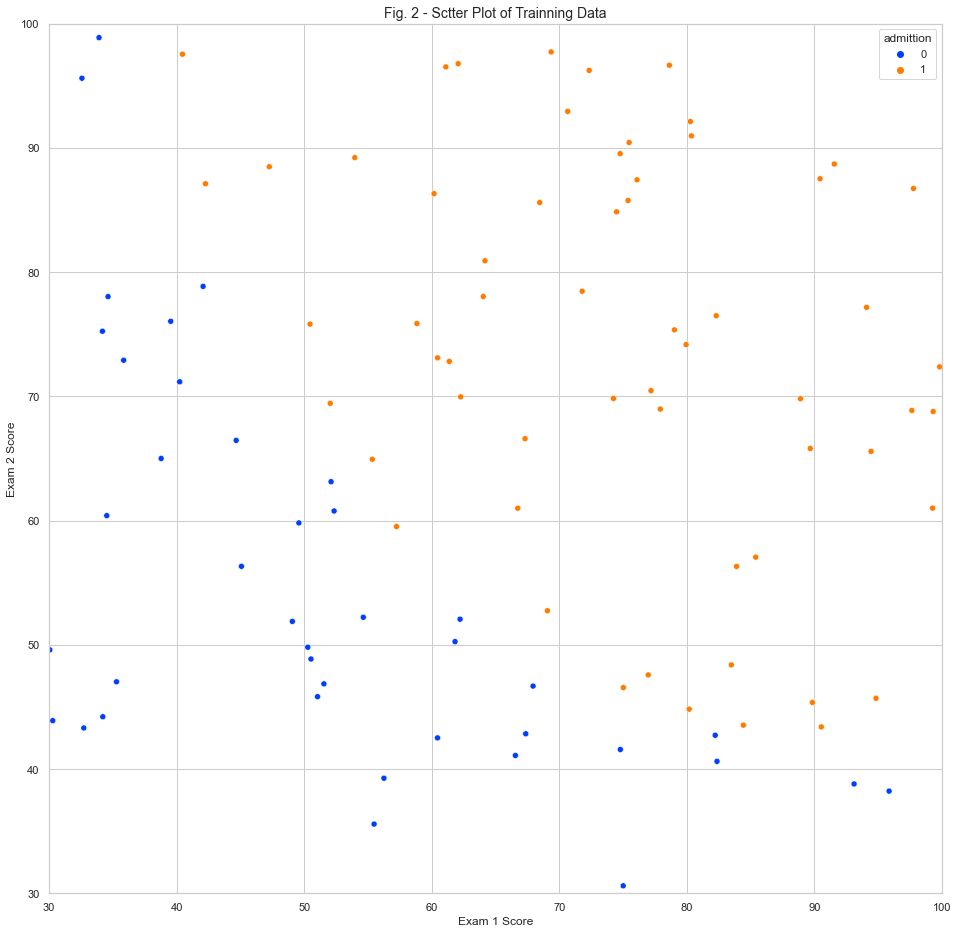

In [19]:
plt.figure(figsize = (16,16))
sns.set_theme(style="whitegrid")
fg01 = sns.scatterplot(data = rawdata,
                       x = 'exam1_score', 
                       y = 'exam2_score',
                       palette = 'bright',
                       hue = 'admittion',
                       markers=True)
plt.ylim(30, 100)
plt.xlim(30, 100)
plt.xlabel('Exam 1 Score', fontsize = 12)
plt.ylabel('Exam 2 Score', fontsize = 12)
plt.title('Fig. 2 - Sctter Plot of Trainning Data', fontsize = 14)                                                                                     
plt.show(fg01)

In [29]:
#
# PROBLEM 1
#
class LogisticRegressor(object):

    """
    Representation of a multivariate regressor with regularization.
    """

    import numpy as np
    import pandas as pd

    def __init__(self, ydata, xdata):
        """
        Initialize a MultivarRegressor instance, saves all parameters as attributes
        of the instance.        
        x: Features (pandas dataframe containing all independent variables for all samples)        
        y: Target (pandas dataframe containing the dependent variable for all samples)
        """
        self.xdata = xdata
        self.ydata = ydata

    def getYcolumns(self):
        """
        Returns the target column as a list.
        """
        return list(self.ydata.columns)

    def getXcolumns(self):
        """
        Returns the features columns as a list.
        """
        return list(self.xdata.columns)

    def getNumberSamples(self):
        """
        Returns the number of samples in the dataframe.
        """
        return len(self.ydata[self.getYcolumns()[0]])

    def getNumberfeatures(self):
        """
        Returns the number of features in the dataframe considering the constant term.
        """
        return len(self.getXcolumns()) + 1

    def InitY(self):
        """
        Returns a numpy vector for the target.
        """
        # Initialize target vector with ones
        y = np.ones((self.getNumberSamples(), 1))
        # Replace columns with target values
        y[:,0] = np.array(self.ydata[self.getYcolumns()[0]])
        return y

    def InitX(self):
        """
        Returns a numpy matrix for the features.
        """
        # Initialize features matrix with ones
        x = np.ones((self.getNumberSamples(), self.getNumberfeatures()))
        # Replace columns with feature values
        count_feature = 0
        for feature in self.getXcolumns():
            x[:, count_feature] = np.array(list(self.xdata[feature]))
            count_feature += 1
        return x

    def InitTheta(self):
        """
        Returns a numpy vector with zeros for theta.
        """
        return np.zeros((1, self.getNumberfeatures()))
        #return np.random.rand(1, self.getNumberfeatures())


    def GradientDescent(self, iterations, alpha, lamb):

        """
        Runs Gradient Descent using Perceptron Algorithm.
        th: the vector theta after all iterations
        j: list of the cost calculated for each iteration
        alpha: Learning rate
        lamb: Regularization term.
        itreation list.
        """

        def sigmoid(x):
            return 1 / (1 + np.exp(-x))

        # Initialize J
        j = []
        # Initialize Y
        y = self.InitY()
        # Initialize X
        x = self.InitX()
        # Initialize Theta
        th = self.InitTheta()
        # Get number of samples
        m = self.getNumberSamples()
        # Create a vector of ones
        vec_ones = np.ones((m, 1))

        e = 0.0000000001
        for it in range(iterations):
            # Calculate hypothesis function
            h = sigmoid(x@(th.T))
            # Regularization Term
            thReg = np.array([list(th[0][0:-1]) + [0]])
            # Calculate cost
            jtemp = sum(-(y.T)@np.log(np.maximum(h,e))/m - ((vec_ones -y).T)@np.log(np.maximum(vec_ones - h, e))/m)
            j.append(jtemp[0])
            # Calculate loss function
            loss = (h - y).T
            # Update Theta
            th = th - alpha*(loss@x + lamb*thReg)/m

        return (th, j)




In [30]:
data = rawdata[rawdata.columns]

mu_house_size  = data['exam1_score'].mean()
std_house_size = data['exam1_score'].std()

data['exam1_score'] = (data['exam1_score'] - mu_house_size)/std_house_size


mu_bedroom  = data['exam2_score'].mean()
std_bedroom = data['exam2_score'].std()

data['exam2_score'] = (data['exam2_score'] - mu_bedroom)/std_bedroom

0.4106180703305038
0.2316632533008708
0.2036051057163244
0.20349770158944003


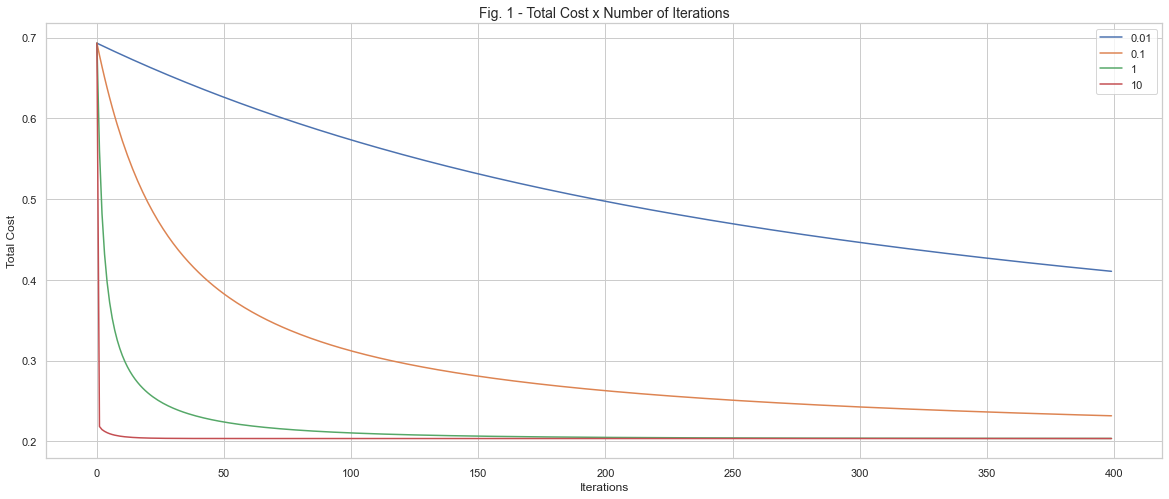

In [32]:
plt.figure(figsize = (20,8))
sns.set_theme(style="whitegrid")

Regressor = LogisticRegressor(ydata = data[['admittion']], xdata = data[['exam1_score', 'exam2_score']])

for alpha in [0.01, 0.1, 1, 10]:
    theta, cost = Regressor.GradientDescent(alpha=alpha, lamb = 0, iterations=400)
    print(cost[-1])

    fg01 = sns.lineplot(x = range(400), 
                        y = cost,
                        palette = 'flare',
                        markers=True,
                        label=str(alpha))

plt.xlabel('Iterations', fontsize = 12)
plt.ylabel('Total Cost', fontsize = 12)
plt.title('Fig. 1 - Total Cost x Number of Iterations', fontsize = 14)
plt.show(fg01)

In [35]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

In [51]:
x = np.array([[45,85,1]])
x

array([[45, 85,  1]])

In [52]:
z = [(x[0][0] - mu_house_size)/std_house_size, (x[0][1] - mu_bedroom)/std_bedroom, 1]
z = np.array([z])
z

array([[-1.06095376,  1.01050536,  1.        ]])

In [56]:
sigmoid(z@(theta.T))

array([[0.77629069]])